In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
from scipy import stats, optimize, interpolate
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import os

In [87]:
print(os.listdir())

['-200315-183052.DS_Task_1 (2)', '.ipynb_checkpoints', '0001018360002233050_09152019_10052019.PDF', '0001018360002233050_10152019_11042019.PDF', '04032020_FNO_PLStatement.pdf', '051030821091905732_1569061807776.pdf', '09-Mar-2020_fno_ordertrades_16816.pdf', '1-2703290308698_314600869_enc.pdf', '1012.pdf', '10dimensionalityreductionwithpca1-200315-183245.ipynb', '12clustering1-200315-183239.ipynb', '1506.pdf', '1691.pdf', '1695.pdf', '17-Oct-2019_fno_ordertrades_15891.pdf', '17CS664- PYTHON-MODULE2-2020.pdf', '17CS664-PYTHON-MODULE 1-2020.pdf', '1RN17IS068', '1RN17IS068(Exam Application).pdf', '1RN17IS068(Pooja Ravi ).pdf', '1RN17IS068-Pooja Ravi (1).pdf', '1RN17IS068-Pooja Ravi.pdf', '1RN17IS068.pdf', '1RN17IS068.zip', '1st program-find s.pdf', '1TheHundredPageMLBook_byAndriyBurkov-191123-115139 (1).zip', '1TheHundredPageMLBook_byAndriyBurkov-191123-115139.zip', '20200210_OrderTrades_66816.pdf', '28-06-2018-TO-26-06-2020ICICIBANKEQN (1).csv', '28-06-2018-TO-26-06-2020ICICIBANKEQN (2).c

In [88]:
os.getcwd()

'C:\\Users\\Pooja ravi\\Downloads'

# Reading file and printing columns

In [157]:
df=pd.read_csv('framingham.csv')

In [158]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [159]:
print("COLUMN NAMES:")
print("----------")
for col in df.columns:
    print(col)
    print("\n")

COLUMN NAMES:
----------
male


age


education


currentSmoker


cigsPerDay


BPMeds


prevalentStroke


prevalentHyp


diabetes


totChol


sysBP


diaBP


BMI


heartRate


glucose


TenYearCHD




# Handling missing values

In [160]:
df = df.replace(np.nan,0)

# Handling outliers

In [161]:
z_score = stats.zscore(df)
abs_z_score = np.abs(z_score)
filtered_entries = (abs_z_score<3).all(axis=1)
df = df[filtered_entries]
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Handling duplicate values

In [162]:
df.duplicated(subset=None,keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
4235    False
4236    False
4237    False
4238    False
4239    False
Length: 3811, dtype: bool

# Exploratory Data Analysis

In [163]:
def draw_histograms(dataframe,features,rows,cols):
    fig=plt.figure(figsize=(20,20))
    for i,feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+"Distribution",color='DarkRed')
        fig.tight_layout()
    plt.show()


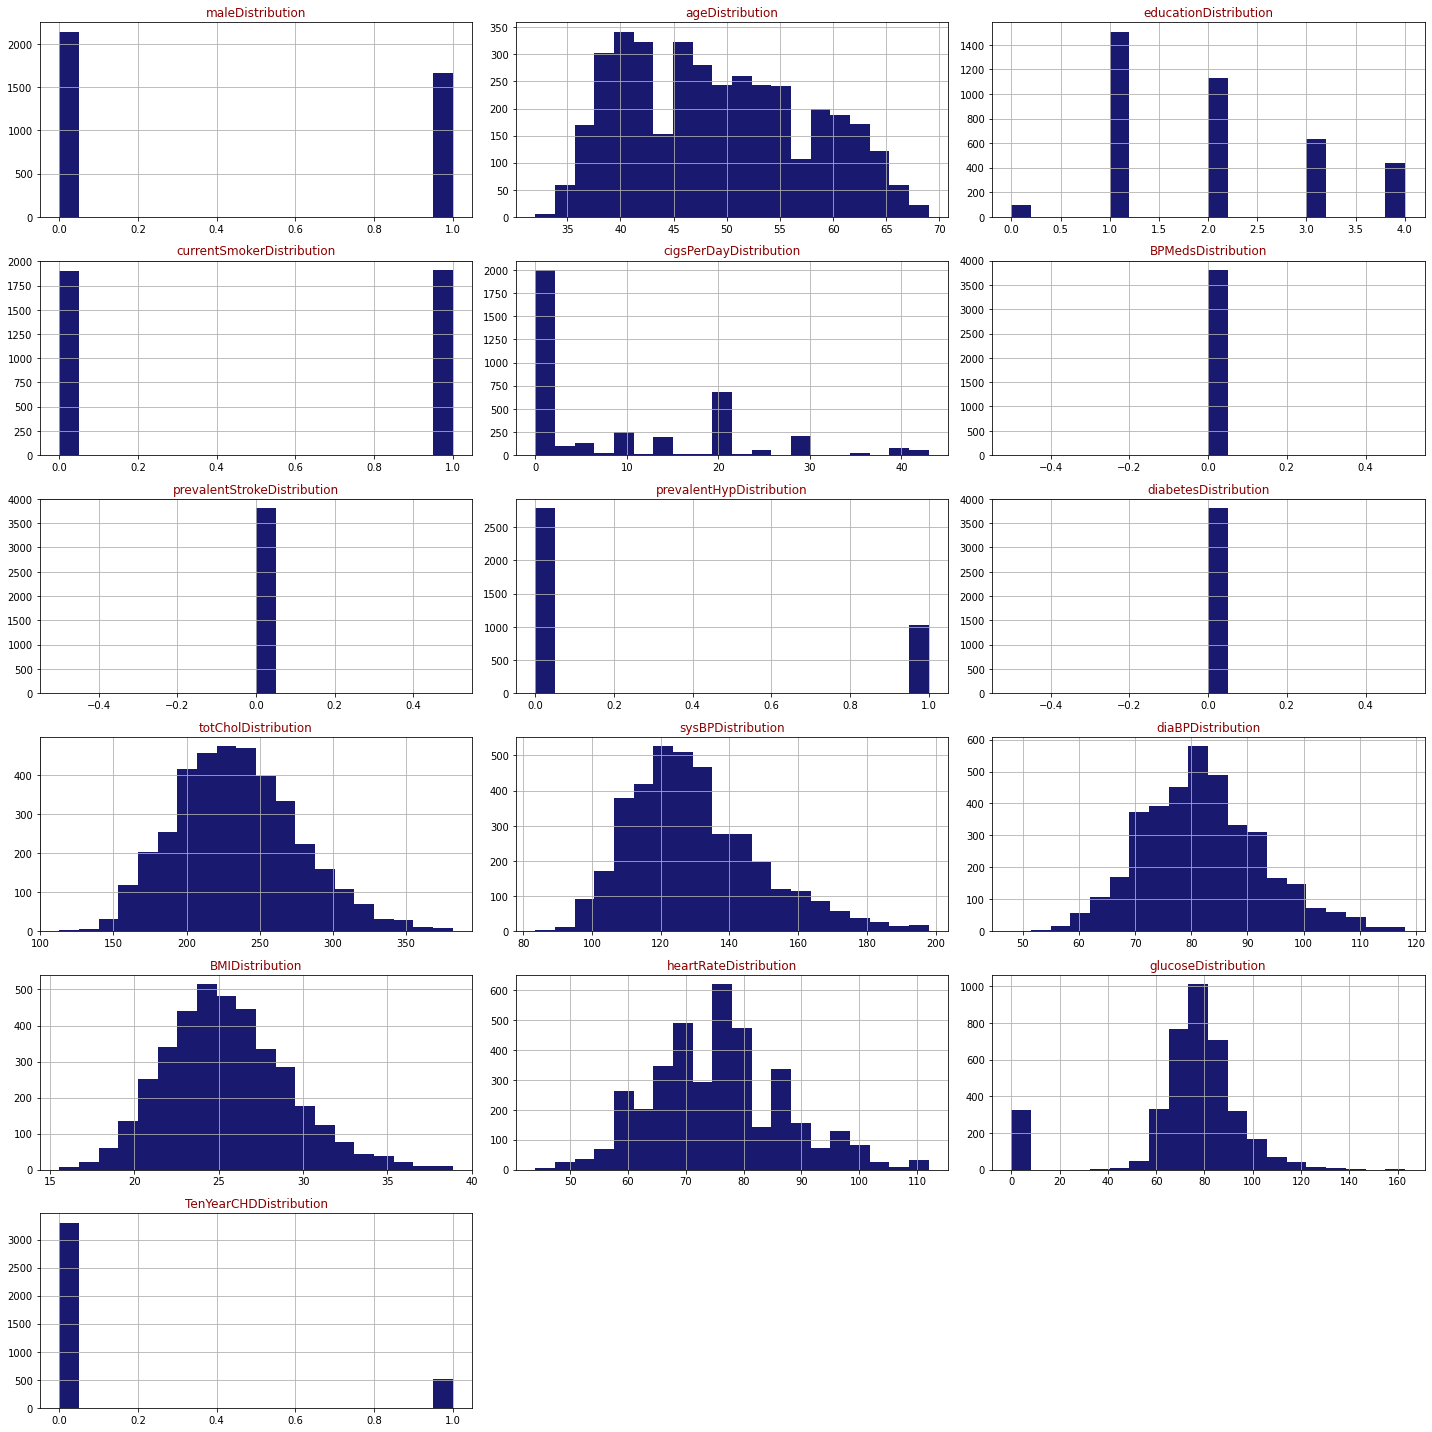

In [164]:
draw_histograms(df,df.columns,6,3)

In [165]:
df.TenYearCHD.value_counts()

0    3301
1     510
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

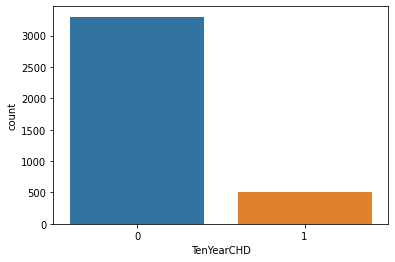

In [166]:
sns.countplot(x='TenYearCHD',data=df)

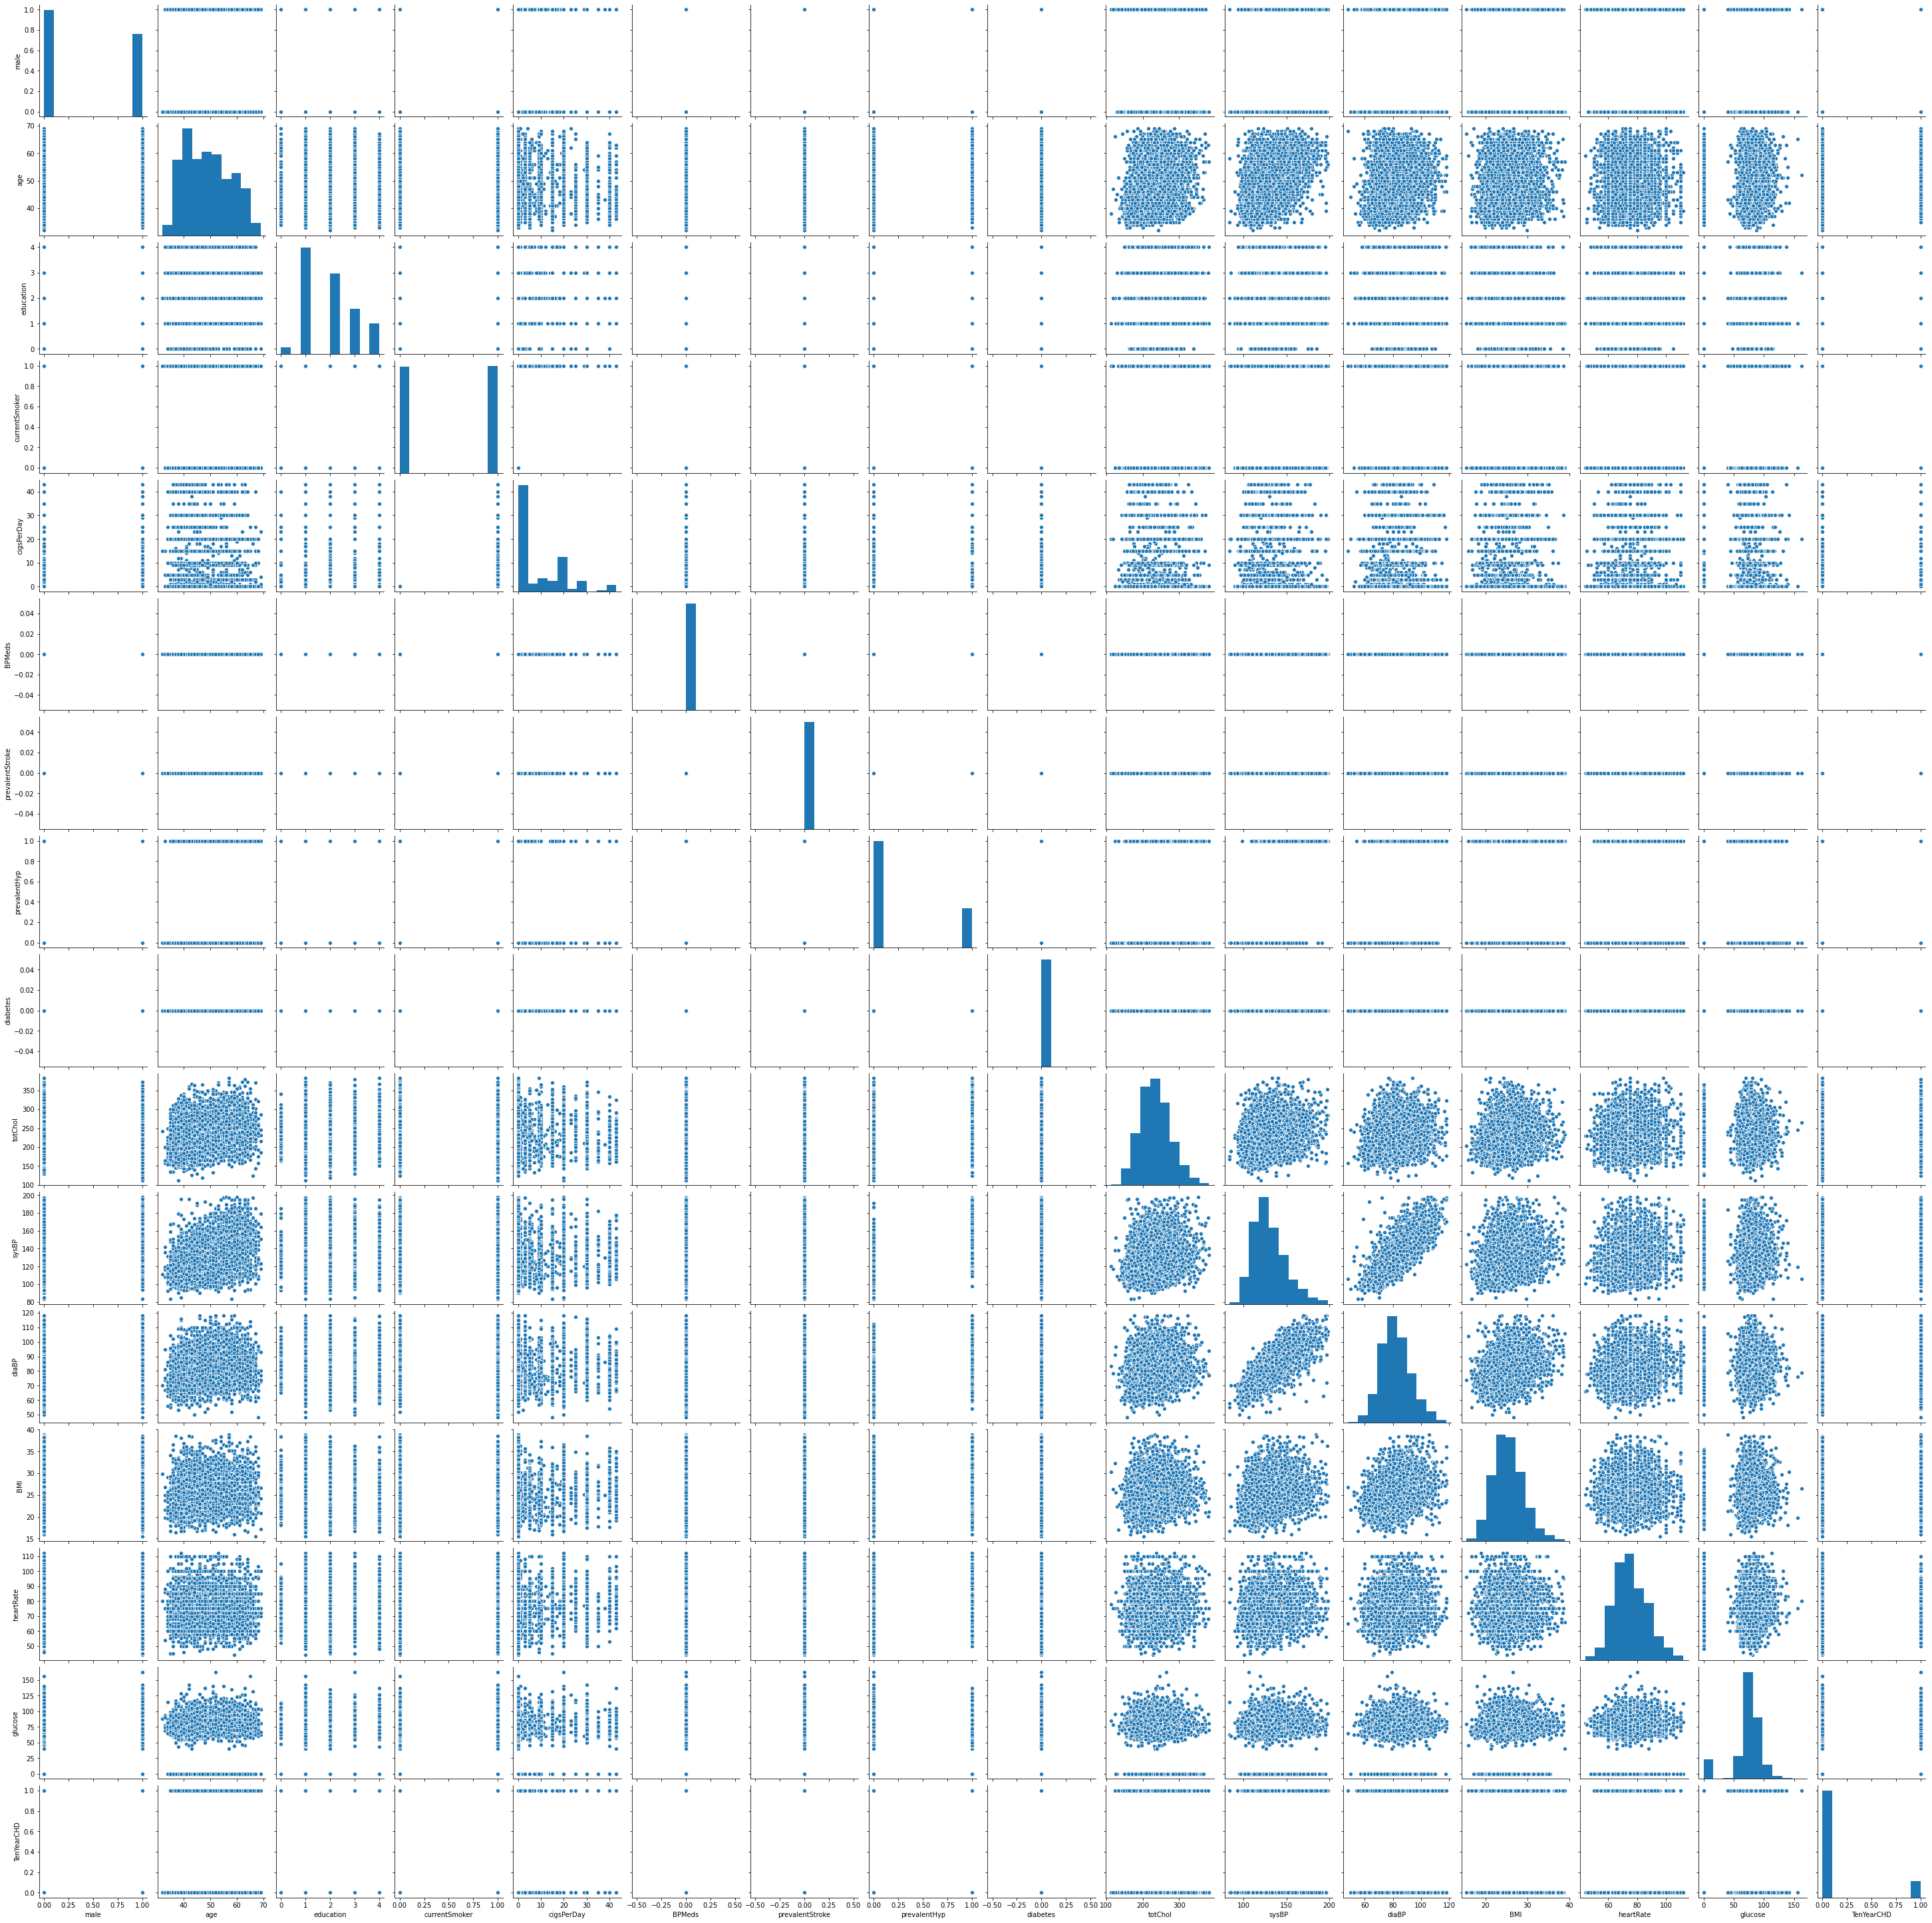

In [167]:
sns.pairplot(data=df)

In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,3811.0,0.437418,0.496133,0.00,0.000,0.00,1.00,1.00
age,3811.0,49.108895,8.460155,32.00,42.000,48.00,56.00,69.00
education,3811.0,1.950144,1.058217,0.00,1.000,2.00,3.00,4.00
currentSmoker,3811.0,0.501706,0.500063,0.00,0.000,1.00,1.00,1.00
cigsPerDay,3811.0,8.937024,11.555718,0.00,0.000,0.00,20.00,43.00
BPMeds,3811.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00
prevalentStroke,3811.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00
prevalentHyp,3811.0,0.268958,0.443476,0.00,0.000,0.00,1.00,1.00
diabetes,3811.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00
totChol,3811.0,235.087903,42.155099,113.00,205.000,233.00,261.00,382.00


# Calculating basic statistics

In [169]:
print("MEAN :")
print("--------")
print(df.mean())
print("\n")
print("MEDIAN :")
print("--------")
print(df.median())
print("\n")
print("MODE :")
print("-------")
print(df.mode())
print("\n")
print("VARIANCE :")
print("--------")
print(df.var())
print("\n")
print("STANDARD DEVIATION :")
print("------------------")
print(df.std())
print("\n")
print("STANDARD ERROR :")
print("-----------")
print(df.sem())

MEAN :
--------
male                 0.437418
age                 49.108895
education            1.950144
currentSmoker        0.501706
cigsPerDay           8.937024
BPMeds               0.000000
prevalentStroke      0.000000
prevalentHyp         0.268958
diabetes             0.000000
totChol            235.087903
sysBP              129.836919
diaBP               81.837969
BMI                 25.492173
heartRate           75.372081
glucose             72.612700
TenYearCHD           0.133823
dtype: float64


MEDIAN :
--------
male                 0.00
age                 48.00
education            2.00
currentSmoker        1.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            233.00
sysBP              127.00
diaBP               81.00
BMI                 25.22
heartRate           75.00
glucose             76.00
TenYearCHD           0.00
dtype: float64


MODE :
-------
   male  age  educati

# Columns - important to predict heart disease

In [176]:
data = df[['age','diaBP','totChol','cigsPerDay','heartRate','TenYearCHD']]

In [177]:
array = data.values
X = array[:,0:6]
Y = array[:,5]
print(X)
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.4, random_state=5)
norm = StandardScaler()
X_train = norm.fit_transform(X_train)
X_validation = norm.fit_transform(X_validation)
print(X_train)

[[ 39.  70. 195.   0.  80.   0.]
 [ 46.  81. 250.   0.  95.   0.]
 [ 48.  80. 245.  20.  75.   0.]
 ...
 [ 52.  83. 269.   0.  80.   0.]
 [ 40.  98. 185.   0.  67.   0.]
 [ 39.  86. 196.  30.  85.   0.]]
[[-0.83856867 -0.74382977  0.43175988  0.09757124  1.10796994 -0.38791508]
 [ 0.72886223  1.30382947  0.12402418 -0.77644071 -0.28454977 -0.38791508]
 [ 0.48771901 -0.09230183  1.94676641  0.97158319  0.41171009 -0.38791508]
 ...
 [ 0.60829062  0.27999985 -0.46777525  0.97158319 -1.15487458 -0.38791508]
 [-0.83856867  0.23346214 -0.79918293  1.84559514  1.2820349  -0.38791508]
 [-0.23571064 -0.92998061  1.63903071  0.97158319  0.84687249  2.57788381]]


In [178]:
models =[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
#models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [179]:
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_validation)
model.score(X_validation,Y_validation)*100

100.0

In [180]:
results = []
names = []
print("Model\tAccuracy Mean\t\tAccuracy Standard Deviation")
for name,model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    #print(cv_results)
    results.append(cv_results)
    names.append(name)
    print('%s:\t%f\t\t%f' % (name, cv_results.mean(),cv_results.std()))

Model	Accuracy Mean		Accuracy Standard Deviation
LR:	1.000000		0.000000
KNN:	1.000000		0.000000
NB:	1.000000		0.000000
SVM:	1.000000		0.000000


SVM and Linear Regression have the same accuracy

Standard deviation is comparatively less for SVM 

So SVM is preferred

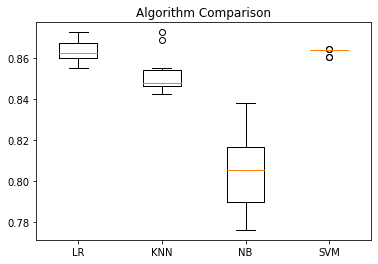

In [62]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [63]:
model = SVC(gamma='auto')
model.fit(X_train,Y_train)
prediction = model.predict(X_validation)

In [64]:
print(accuracy_score(Y_validation, prediction))
print(confusion_matrix(Y_validation, prediction))#prediction matrix
print(classification_report(Y_validation, prediction))

0.8701639344262295
[[1327    0]
 [ 198    0]]
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1327
         1.0       0.00      0.00      0.00       198

    accuracy                           0.87      1525
   macro avg       0.44      0.50      0.47      1525
weighted avg       0.76      0.87      0.81      1525



C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
